# Error analysis of the global pre-processing workflow

Here we reproduce the error analysis shown in [Maussion et al. (2019)](https://www.geosci-model-dev.net/12/909/2019/) **for the pre-processing part only, and for the new glacier directories (version 1.4)**. The error analysis of user runs needs a separate handling, see the [deal_with_errors](deal_with_errors.ipynb) notebook for more information.

## Get the files

We download the `glacier_statistics` files from the preprocessed directories folders, at the level 5. That is, we are going to count all errors that happened during the pre-processing chain.

In [1]:
from oggm import utils
import pandas as pd
import seaborn as sns

In [2]:
# This is CRU + centerlines. But you can try CRU+elev_bands, or ERA5+elev_bands, etc!
url = 'https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.4/L3-L5_files/CRU/centerlines/qc3/pcp2.5/no_match/RGI62/b_040/L5/summary/'

In [3]:
df = []
for rgi_reg in range(1, 19):
    fpath = utils.file_downloader(url + f'glacier_statistics_{rgi_reg:02d}.csv')
    df.append(pd.read_csv(fpath, index_col=0, low_memory=False))
df = pd.concat(df, sort=False).sort_index()

## Analyze the errors

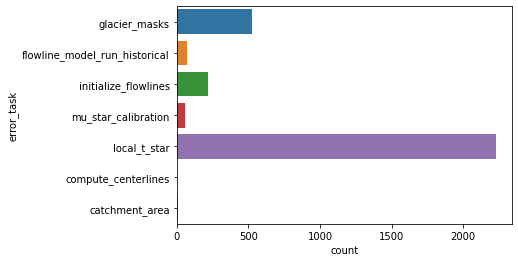

In [4]:
sns.countplot(y="error_task", data=df);

In [7]:
"% area errors all sources: {:.2f}%".format(df.loc[~df['error_task'].isnull()].rgi_area_km2.sum() / df.rgi_area_km2.sum() * 100)

'% area errors all sources: 3.24%'

In [10]:
dfe = df.loc[~df['error_task'].isnull()]
dfe = dfe.loc[~dfe['error_task'].isin(['local_t_star', 'mu_star_calibration'])]
"% area errors before climate: {:.2f}%".format(dfe.rgi_area_km2.sum() / df.rgi_area_km2.sum() * 100)

'% area errors before climate: 0.41%'

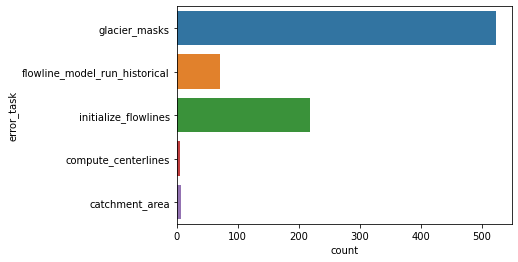

In [11]:
sns.countplot(y="error_task", data=dfe);

In [6]:
# 15 largest glaciers
df.loc[~df['error_task'].isnull()].sort_values(by='rgi_area_km2', ascending=False)[['rgi_area_km2', 'error_task', 'error_msg']].iloc[:15]

,rgi_area_km2,error_task,error_msg
rgi_id,,,
RGI60-17.15804,790.282,mu_star_calibration,MassBalanceCalibrationError: RGI60-17.15804 mu...
RGI60-17.15808,721.950,local_t_star,MassBalanceCalibrationError: RGI60-17.15808: m...
RGI60-13.54431,663.729,flowline_model_run_historical,RuntimeError: CFL error: required time step sm...
RGI60-17.15897,428.505,local_t_star,MassBalanceCalibrationError: RGI60-17.15897: m...
RGI60-05.10735,392.607,local_t_star,MassBalanceCalibrationError: RGI60-05.10735: m...
RGI60-05.10634,388.067,local_t_star,MassBalanceCalibrationError: RGI60-05.10634: m...
RGI60-05.10617,373.290,local_t_star,MassBalanceCalibrationError: RGI60-05.10617: m...
RGI60-05.10762,309.061,local_t_star,MassBalanceCalibrationError: RGI60-05.10762: m...
RGI60-05.10748,289.188,local_t_star,MassBalanceCalibrationError: RGI60-05.10748: m...


## What's next?

- return to the [OGGM documentation](https://docs.oggm.org)
- back to the [table of contents](welcome.ipynb)